In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# DATA LOADING & EDA:

In [43]:
# it's a .tsv file. So tab separator is used
df = pd.read_csv("C:/Users/DELL/Desktop/SMSSpamCollection", sep='\t', names=['tag','message'])

df.head()

,tag,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.shape

(5572, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tag      5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [46]:
count = df['tag'].value_counts()
print(count)
print('\nsum of non-null tag datapoints=', count.sum())

ham     4825
spam     747
Name: tag, dtype: int64

sum of non-null tag datapoints= 5572


## Observatios:
* As we can see, there are 5572 datapoints.
* No tag or message is having null-values as seen from info.
* To prove that; first of all, we know that tag is defined based upon message. So if there is no null tag athat would mean no null message. And from just above cell we proved that there is indeed no null-point.

just to show it more clearly.

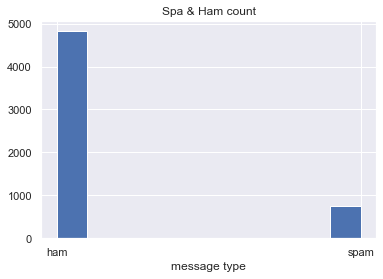

In [47]:
sns.set()
plt.title('Spa & Ham count')
plt.xlabel('message type')
plt.hist(x=df['tag'])
plt.show()

There seems to be nothing more to do in EDA on tag. Let's deal with EDA on message.

In [48]:
from wordcloud import WordCloud, STOPWORDS

In [49]:
spam_df = df.loc[df.tag == 'spam']
ham_df = df.loc[df.tag == 'ham']

In [50]:
print('head of spam dataframe')
spam_df.head()

head of spam dataframe


,tag,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [51]:
print('tail of spam dataframe')
spam_df.tail()

tail of spam dataframe


,tag,message
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...


In [52]:
print('head of ham dataframe')
ham_df.head()

head of ham dataframe


,tag,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [53]:
print('tail of ham dataframe')
ham_df.tail()

tail of ham dataframe


,tag,message
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Starting with Spam datapoints**

In [54]:
spam_collection = '    '.join(spam_df['message']) # creating collection 

In [55]:
spam_collection[0:4000]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s    FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv    WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.    Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030    SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info    URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18    XXXMobileMovieClub: To use your credit, click the WAP link in the 

In [16]:
cleaned_spam = " ".join([word for word in spam_collection.split()
                            if 'http' not in word
                            and not word.startswith('www')
                            ])

# we have cleaned all links

In [17]:
spam_wc = WordCloud(stopwords=STOPWORDS,background_color='black',width=1600,height=800).generate(cleaned_spam)

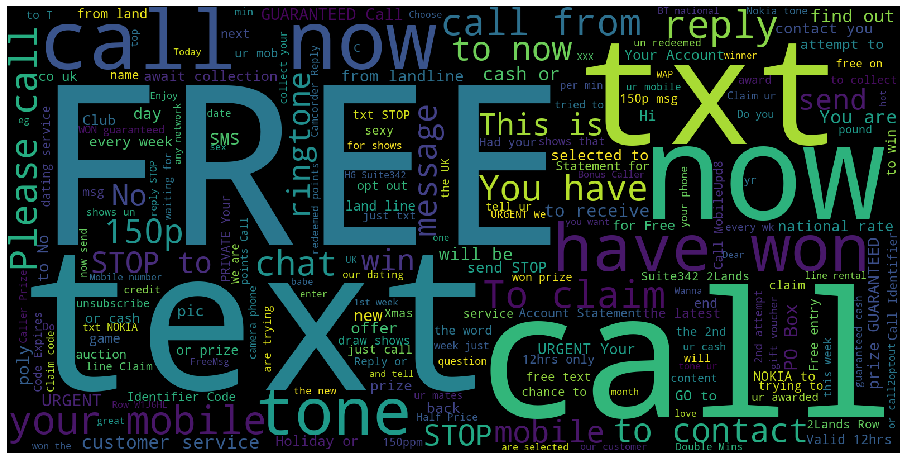

In [18]:
plt.figure(1,figsize=(16,9))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

## Observations:
* After doing cleaning of links & stopwords. We can see words like FREE, text, now, have won, To claim, customer service etc are quite repetitive in spam messages.
* Working with this data would be easier & efficient if all were lowercase. But before that, let's deal with ham data.

**for ham datapoints**

In [19]:
ham_collection = '    '.join(ham_df['message'])

In [20]:
ham_collection[0:4000]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...    Ok lar... Joking wif u oni...    U dun say so early hor... U c already then say...    Nah I don\'t think he goes to usf, he lives around here though    Even my brother is not like to speak with me. They treat me like aids patent.    As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune    I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.    I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.    I HAVE A DATE ON SUNDAY WITH WILL!!    Oh k...i\'m watching here:)    Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.    Fine if that\

In [21]:
cleaned_ham = " ".join([word for word in ham_collection.split()
                            if 'http' not in word
                            and not word.startswith('www')
                            ])

In [22]:
ham_wc = WordCloud(stopwords=STOPWORDS,background_color='black',width=1600,height=800).generate(cleaned_ham)

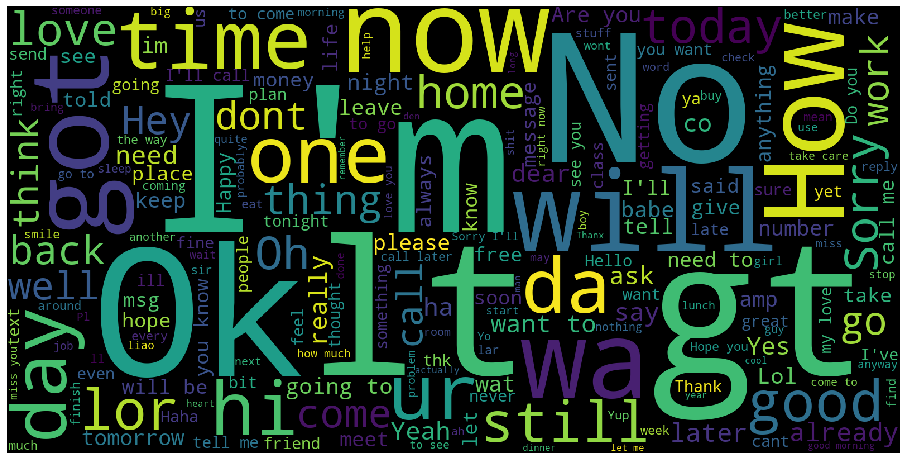

In [23]:
plt.figure(1,figsize=(16,9))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

## Observations:
* Words like No, now, lt, gt, ok,love, sorry, How etc seem to be used too often in this text.
(lt: link text, gt: follow back)
* But words like I'm, im, are quite same. Also sorry & Sorry are same.
* Let's first convert them to lowercase then deal with them.
* The whole dataframe also contains lots of special characters, digits & similar words. 

So let's deal with all that in preprocessing.

# DATA PREPROCESSING:

In [24]:
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
clean_msg = [] # a list  to store cleaned messages

clean_msg_len = [] # a list to store size of cleaned messages

In [28]:
def preprocess(raw_msg):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_msg)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    collection = letters_only.split()
    
    # remove stop words                
    collection = [w for w in collection if not w in stopwords.words("english")]
    
    #Lemmatization
    collection = [lemmatizer.lemmatize(word) for word in collection]
    
    clean_msg.append(" ".join(collection))
    
    clean_msg_len.append(len(collection))

## Observations:

Here we are defining a function which will do the following:
* Removing of special charcters & digits
* Convert complete data to lowercase.
* tokenizing & removal of stop words.
* Then it does lemmatization.
* We filled two list which we predefined to be stores in a data frame.

In [29]:
df['message'].progress_apply(lambda x: preprocess(x))

df['clean_msg_stem'] = clean_msg

df['msg_length_stem'] = clean_msg_len

In [30]:
df

,tag,message,clean_msg_stem,msg_length_stem
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...,17
5568,ham,Will ü b going to esplanade fr home?,b going esplanade fr home,5
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,3
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,13


# DATA PREPRATION:

In [31]:
# Preparing the target variable
# I made ham 0 as there are lots of ham

df['target']=df['tag'].apply(lambda x:0 if x=='ham' else 1)

df

,tag,message,clean_msg_stem,msg_length_stem,target
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...,17,1
5568,ham,Will ü b going to esplanade fr home?,b going esplanade fr home,5,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,3,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,13,0


## Observations:
* cleam_msg_stem is processed version of message & msg_lenght_stem tells about number of words in that.
* target=0 means ham message, target=1 means spam message.

In [32]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [33]:
train_msg=[] # a list for message to be trained
for msg in train['clean_msg_stem']:
    train_msg.append(msg)

test_msg=[] # a list for message to be tested
for msg in test['clean_msg_stem']:
    test_msg.append(msg)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word") # text to numerical data

train_features = vectorizer.fit_transform(train_msg) # coverting and learning from text data to be trained

test_features = vectorizer.transform(test_msg) # coverting test data

In [35]:
#let's have an overview of conversion

print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 6278
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6278)


## Observations:
* In the train data, we have 6278 different words.
* We have data as sparse matrix. To apply any model, we would need dense matrix (which we'll do shortly)

In [36]:
# let's have a look a all the words and the number of times they occur
vectorizer.vocabulary_

{'reply': 4463,
 'win': 6061,
 'weekly': 5997,
 'fifa': 1873,
 'world': 6134,
 'cup': 1228,
 'held': 2383,
 'send': 4727,
 'stop': 5170,
 'end': 1654,
 'service': 4746,
 'hello': 2387,
 'sort': 5024,
 'town': 5603,
 'already': 163,
 'dont': 1496,
 'rush': 4583,
 'home': 2445,
 'eating': 1594,
 'nacho': 3523,
 'let': 3004,
 'know': 2891,
 'eta': 1709,
 'come': 1041,
 'guoyang': 2289,
 'go': 2182,
 'tell': 5391,
 'told': 5554,
 'hey': 2401,
 'sathya': 4637,
 'till': 5514,
 'dint': 1433,
 'meet': 3293,
 'even': 1720,
 'single': 4883,
 'time': 5515,
 'saw': 4649,
 'situation': 4896,
 'orange': 3786,
 'brings': 691,
 'ringtones': 4532,
 'chart': 887,
 'hero': 2398,
 'free': 2016,
 'hit': 2416,
 'week': 5995,
 'pic': 3986,
 'wap': 5942,
 'receiving': 4384,
 'tip': 5518,
 'sitting': 4895,
 'mu': 3482,
 'waiting': 5920,
 'everyone': 1729,
 'get': 2139,
 'suite': 5248,
 'take': 5337,
 'shower': 4835,
 'finish': 1897,
 'liao': 3008,
 'urgent': 5789,
 'mobile': 3404,
 'awarded': 398,
 'bonus': 62

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [38]:
# creating a list so that we can apply all the classifiers one by one to find the best
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [39]:
def description(x,y):
    print("\033[1m" +classifier.__class__.__name__+' Performance Analysis:'+ "\033[0m")
    accuracy = accuracy_score(x, y)
    print('\nAccuracy: '+str(accuracy))
    report = classification_report(x, y)
    print('\nclassification report:''\n'+report)
    con = confusion_matrix(x, y)
    sns.heatmap(con, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    fpr, tpr, thresholds = roc_curve(x,y)
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], linestyle='--')
    # Plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.show()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

LogisticRegression Performance Analysis:

Accuracy: 0.9847533632286996

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



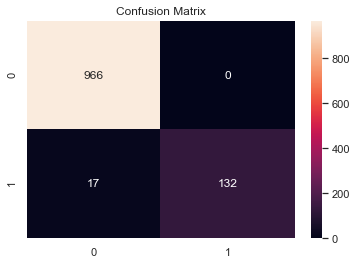

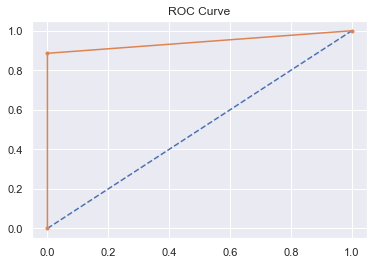

 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.51s/it]

DecisionTreeClassifier Performance Analysis:

Accuracy: 0.9739910313901345

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.94      0.86      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



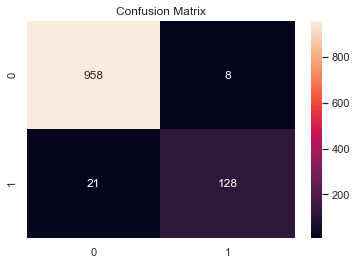

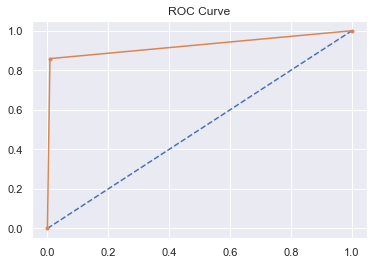

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:19<00:06,  6.51s/it]

SVC Performance Analysis:

Accuracy: 0.9847533632286996

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



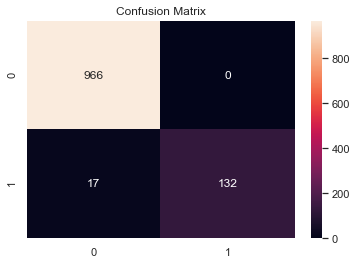

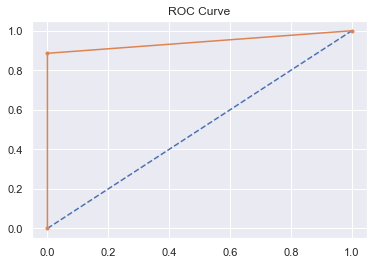

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:23<00:00, 27.93s/it]


In [40]:
dense_features = train_features.toarray() # creating dense train matrix

dense_test = test_features.toarray() # creating dense test matrix

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    description(test['target'],pred)

## Observation:
* As we can see, all the models are having quite same accuracy, f1-score, ROC etc. Based upon only that probably Logistic Reg, or SVM seems best option.
* But time taken by Logistic Regression, even with its perforance analysis, is quite low. So Logistic Regresion would be ideal for current dataset.

# The End!